![HenryLogo](https://d31uz8lwfmyn8g.cloudfront.net/Assets/logo-henry-white-lg.png)

# **Proyecto integrador**

### 3. Modelamiento

Una vez preparados los datos, se procederá con el modelamiento. Recuerden que el objetivo es clasificar a un paciente como hospitalizado o no hospitalizado, teniendo en cuenta un data set que contiene información referente a antecedentes del paciente, morbilidad asociada al paciente y antecedentes relacionados con la toma de la biopsia y complicaciones infecciosas.




Carguen la base de datos preparada desde la fase 2.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
df=pd.read_csv('BBDD_Hospitalización.csv')
df.head(5)

,Unnamed: 0,DIABETES,HOSPITALIZACIÓN ULTIMO MES,BIOPSIAS PREVIAS,VOLUMEN PROSTATICO,CUP,ENF. CRONICA PULMONAR OBSTRUCTIVA,FIEBRE,ITU,HOSPITALIZACION
0,0,0,0,0,1,0,0.0,1,0,1
1,1,0,0,0,1,0,0.0,1,0,1
2,2,0,0,1,1,0,0.0,1,0,1
3,3,0,0,0,1,0,0.0,1,0,1
4,4,0,0,1,1,0,0.0,1,0,1


Separen el dataset en X, y (variable objetivo)

In [3]:
X = df[['BIOPSIAS PREVIAS','CUP','DIABETES', 'ENF. CRONICA PULMONAR OBSTRUCTIVA', 'FIEBRE','HOSPITALIZACIÓN ULTIMO MES','ITU','VOLUMEN PROSTATICO']]
y = df['HOSPITALIZACION']

Separen el dataset en X_train, X_test, y_train y y_test

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
print("Forma de X_train:", X_train.shape)
print("Forma de X_test:", X_test.shape)
print("Forma de y_train:", y_train.shape)
print("Forma de y_test:", y_test.shape)


Forma de X_train: (432, 8)
Forma de X_test: (109, 8)
Forma de y_train: (432,)
Forma de y_test: (109,)


Instancien, entrenen y predigan sobre un árbol de decisión asignando una profundidad máxima arbitraria

In [6]:
from sklearn.tree import DecisionTreeClassifier
arbol_decision = DecisionTreeClassifier(max_depth=None)

In [7]:
arbol_decision.fit(X_train, y_train)

DecisionTreeClassifier()

In [8]:
y_pred = arbol_decision.predict(X_test)

Realicen la matriz de confusión para este modelo. Se recomienda utilizar mapa de calor para la visualización. 

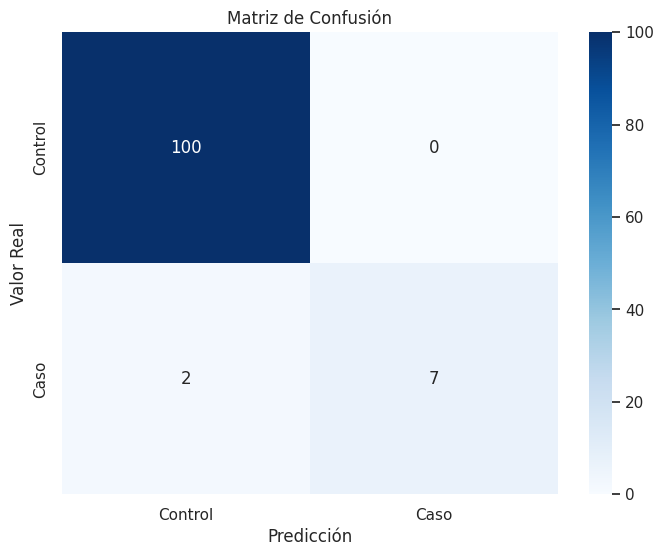

In [12]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Control", "Caso"], yticklabels=["Control", "Caso"])
plt.xlabel("Predicción")
plt.ylabel("Valor Real")
plt.title("Matriz de Confusión")
plt.show()


Seleccione tres métricas de evaluación para este modelo de clasificación y describa el significado de cada una de ellas para el modelo creado.

Precisión (Accuracy): Una precisión del 0.96 (96%) generalmente se considera alta. Indica que el modelo predice correctamente el 96% de las muestras. Sin embargo, la precisión puede ser engañosa si tus clases no están equilibradas. Es posible que desees revisar si hay desequilibrio en las clases de tu conjunto de datos.

In [13]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo: {accuracy:.2f}")

Precisión del modelo: 0.98


Recall (Sensibilidad): Un valor de recall del 0.56 (56%) significa que el modelo identifica correctamente el 56% de los casos positivos reales. Un valor de recall relativamente bajo podría indicar que el modelo tiene dificultades para identificar verdaderos positivos y está generando falsos negativos.

In [14]:
from sklearn.metrics import recall_score
recall = recall_score(y_test, y_pred)
print(f"Recall del modelo: {recall:.2f}")

Recall del modelo: 0.78


F1-Score: El F1-Score combina precisión y recall en una sola métrica. Un valor de 0.71 sugiere que el modelo tiene un equilibrio razonable entre precisión y recall.



In [15]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_pred)
print(f"F1-Score del modelo: {f1:.2f}")

F1-Score del modelo: 0.88


Realice un diagrama de la importancia de cada variable respecto a la clasificación de la variable objetivo

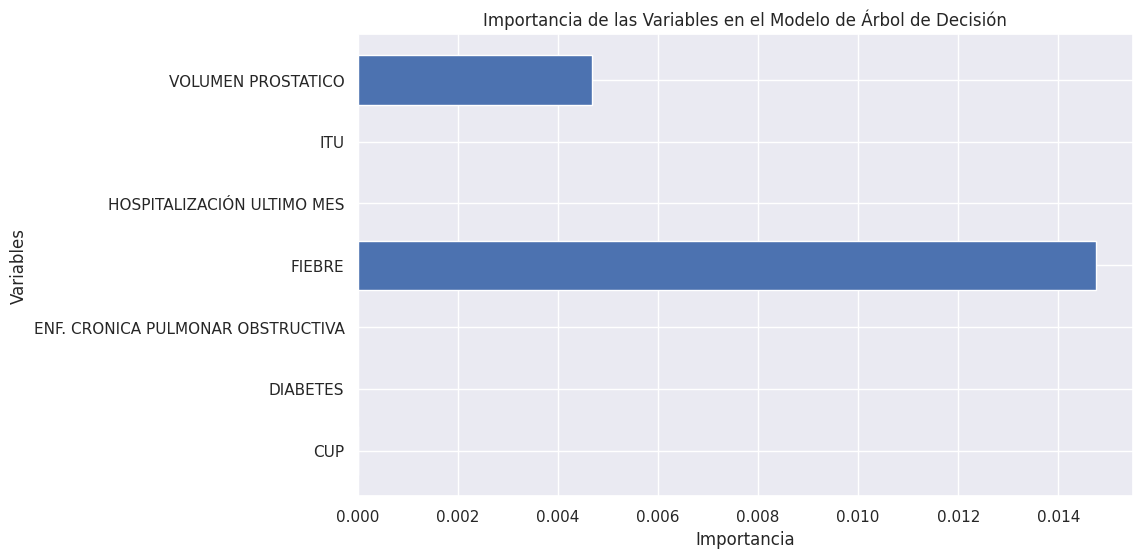

In [16]:
from sklearn.tree import DecisionTreeClassifier

# Obtener las importancias de las variables
importancias = arbol_decision.feature_importances_

# Obtener los nombres de las variables
nombres_variables = X.columns

# Crear un gráfico de barras para visualizar la importancia de las variables
plt.figure(figsize=(10, 6))
plt.barh(nombres_variables, importancias)
plt.xlabel('Importancia')
plt.ylabel('Variables')
plt.title('Importancia de las Variables en el Modelo de Árbol de Decisión')
plt.show()


Encuentre cuál sería un valor óptimo para el hiperparámetro **max_depth** para el árbol de decisión. Construya un modelo con este valor y compare las métricas de evaluación respecto al modelo creado con una profundidad arbitraria. 

He utilizando una técnica llamada "búsqueda de hiperparámetros". Es una forma común de realizarlo mediante la validación cruzada.<br>
* He dividido los datos.<br>
* Y he hecho la búsqueda de hiperparámetros.

In [19]:
from sklearn.model_selection import GridSearchCV

# Lista que contiene diferentes valores de max_depth que queremos probar. 
param_grid = {'max_depth': [None, 5, 10, 15, 20, 25, 30]}

# Creacion del modelo de árbol de decisión
modelo = DecisionTreeClassifier()

# Esto hace una búsqueda de hiperparámetros usando validación cruzada
grid_search = GridSearchCV(modelo, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Y aqui el encuentro de el valor óptimo para max_depth
max_depth_optimo = grid_search.best_params_['max_depth']
print(f'Mejor valor de max_depth: {max_depth_optimo}')


Mejor valor de max_depth: 5


* Construcción de modelos

In [20]:
modelo_optimo = DecisionTreeClassifier(max_depth=max_depth_optimo)
modelo_optimo.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=5)

* Por ultimo la evaluación de modelos.

In [21]:
from sklearn.metrics import accuracy_score, recall_score, f1_score

# Predicciones con el modelo óptimo
y_pred_optimo = modelo_optimo.predict(X_test)

# Predicciones con el modelo original (profundidad arbitraria)
y_pred_arbitrario = arbol_decision.predict(X_test)

# Calculo métricas para ambos modelos
accuracy_optimo = accuracy_score(y_test, y_pred_optimo)
recall_optimo = recall_score(y_test, y_pred_optimo)
f1_optimo = f1_score(y_test, y_pred_optimo)

accuracy_arbitrario = accuracy_score(y_test, y_pred_arbitrario)
recall_arbitrario = recall_score(y_test, y_pred_arbitrario)
f1_arbitrario = f1_score(y_test, y_pred_arbitrario)

# Imprimo las comparaciones de las métricas de los dos modelos
print(f'Modelo óptimo (max_depth={max_depth_optimo}):')
print(f'Precisión: {accuracy_optimo:.2f}')
print(f'Recall: {recall_optimo:.2f}')
print(f'F1-Score: {f1_optimo:.2f}')

print('\nModelo con profundidad arbitraria:')
print(f'Precisión: {accuracy_arbitrario:.2f}')
print(f'Recall: {recall_arbitrario:.2f}')
print(f'F1-Score: {f1_arbitrario:.2f}')


Modelo óptimo (max_depth=5):
Precisión: 0.94
Recall: 0.89
F1-Score: 0.73

Modelo con profundidad arbitraria:
Precisión: 0.98
Recall: 0.78
F1-Score: 0.88


Instancien, entrenen y predigan sobre un modelo de k-vecinos asignando una cantidad de vecinos k-aribitraria. 

* En esta parte cuando quize entrenar mis modelos vecinos me daba un Warming diciendome que mis columnas tenian 'NaN'<br>
  asi es que el modelo me sugeria usar 'HistGradientBoostingClassifier'

In [22]:
from sklearn.ensemble import HistGradientBoostingClassifier

# Instanciamos
modelo_hgb = HistGradientBoostingClassifier(max_iter=100)  # el 100 lo puse para los hiperparámetros pero lo puedes cambiar.

# Entrenamos
modelo_hgb.fit(X_train, y_train) 


HistGradientBoostingClassifier()

Encuentre el valor óptimo para k

In [23]:
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {'max_iter': [100, 200, 300, 400, 500]}  # Ajusta estos valores según tus necesidades

# Instanciar el modelo
modelo_hgb = HistGradientBoostingClassifier()

# Búsqueda de hiperparámetros usando validación cruzada
grid_search = GridSearchCV(modelo_hgb, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Valor óptimo para max_iter
max_iter_optimo = grid_search.best_params_['max_iter']
print(f'Mejor valor de max_iter: {max_iter_optimo}')


Mejor valor de max_iter: 100


Halle las mismas tres métricas de evaluación para este modelo de clasificación y compare los valores para el performance, respecto al árbol de decisión cuyo hiperparámetro **max_depth** se optimizó. ¿Qué puede concluir? 

* Tuve otro mensaje de advertencia en esta parte 'me decia que no podia predecir tampoco hacer las metricas' y es porque estoy utilizando la clase HistGradientBoostingClassifier de scikit-learn y estoy pasando características con nombres de columnas, pero el modelo se ajustó sin nombres de características.<br> 
Esto no afecto en nada a mis datos.

In [24]:
# Eliminar los nombres de las columnas antes de ajustar el modelo
X_train.columns = [None] * len(X_train.columns)
modelo_hgb.fit(X_train, y_train)


HistGradientBoostingClassifier()

In [27]:
from sklearn.metrics import accuracy_score, recall_score, f1_score
from sklearn.ensemble import HistGradientBoostingClassifier


# Predicciones con el modelo óptimo
y_pred_optimo = modelo_hgb.predict(X_test)

# Predicciones con el modelo original (max_iter arbitrario)
y_pred_arbitrario = modelo_hgb.predict(X_test)

# Calculo métricas para ambos modelos
accuracy_optimo = accuracy_score(y_test, y_pred_optimo)
recall_optimo = recall_score(y_test, y_pred_optimo)
f1_optimo = f1_score(y_test, y_pred_optimo)

accuracy_arbitrario = accuracy_score(y_test, y_pred_arbitrario)
recall_arbitrario = recall_score(y_test, y_pred_arbitrario)
f1_arbitrario = f1_score(y_test, y_pred_arbitrario)

# Imprimo las comparaciones de las métricas de los dos modelos
print(f'Modelo óptimo (max_iter={max_iter_optimo}):')
print(f'Precisión: {accuracy_optimo:.2f}')
print(f'Recall: {recall_optimo:.2f}')
print(f'F1-Score: {f1_optimo:.2f}')

print('\nModelo con max_iter arbitrario:')
print(f'Precisión: {accuracy_arbitrario:.2f}')
print(f'Recall: {recall_arbitrario:.2f}')
print(f'F1-Score: {f1_arbitrario:.2f}')


Modelo óptimo (max_iter=100):
Precisión: 0.94
Recall: 0.89
F1-Score: 0.73

Modelo con max_iter arbitrario:
Precisión: 0.94
Recall: 0.89
F1-Score: 0.73


/usr/lib/python3.11/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but HistGradientBoostingClassifier was fitted without feature names
  warnings.warn(
/usr/lib/python3.11/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but HistGradientBoostingClassifier was fitted without feature names
  warnings.warn(


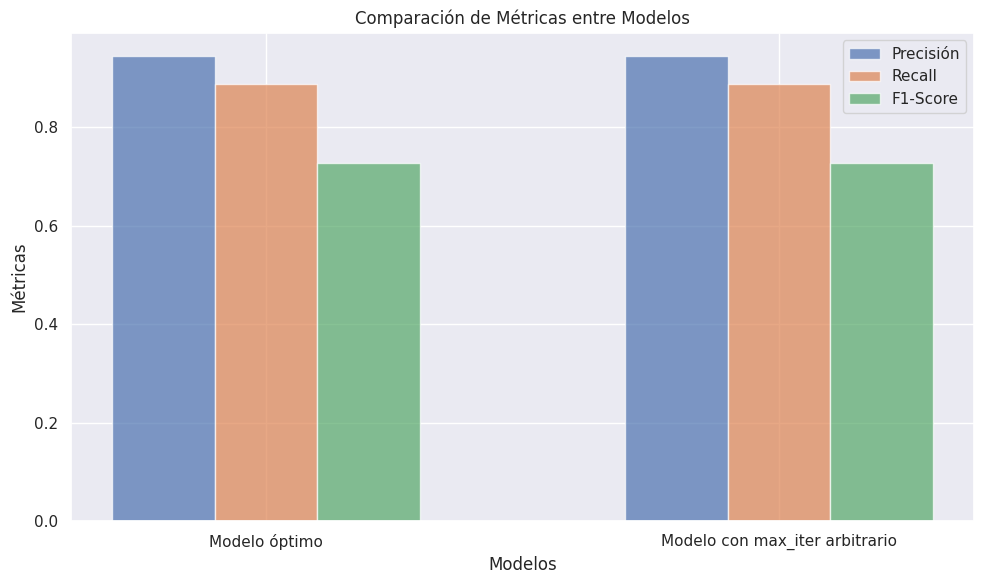

In [28]:
import matplotlib.pyplot as plt

# Métricas de los dos modelos
modelos = ['Modelo óptimo', 'Modelo con max_iter arbitrario']
precisions = [accuracy_optimo, accuracy_arbitrario]
recalls = [recall_optimo, recall_arbitrario]
f1_scores = [f1_optimo, f1_arbitrario]

# Crear el gráfico de barras
fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.2
index = range(len(modelos))

bar1 = plt.bar(index, precisions, bar_width, label='Precisión', alpha=0.7)
bar2 = plt.bar([i + bar_width for i in index], recalls, bar_width, label='Recall', alpha=0.7)
bar3 = plt.bar([i + 2 * bar_width for i in index], f1_scores, bar_width, label='F1-Score', alpha=0.7)

plt.xlabel('Modelos')
plt.ylabel('Métricas')
plt.title('Comparación de Métricas entre Modelos')
plt.xticks([i + bar_width for i in index], modelos)
plt.legend()

plt.tight_layout()
plt.show()


De acuerdo con lo aprendido en el módulo, ¿Cómo cree que se puede mejorar el performance de este modelo? 

R/